In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv(r"C:\Users\svire\Downloads\forestfires (1).csv")

In [4]:
df.head()

month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0          small  
1         0          small  
2         0          small  
3         0          small  
4         0          small  

[5 rows x 31 columns]

In [5]:
# Shape of the data
print(df.shape)

(517, 31)


In [6]:
# Data types of the features
print(df.dtypes)

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object


In [7]:
# Statistical summary of the dataset
print(df.describe())

             FFMC         DMC          DC         ISI        temp          RH  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean    90.644681  110.872340  547.940039    9.021663   18.889168   44.288201   
std      5.520111   64.046482  248.066192    4.559477    5.806625   16.317469   
min     18.700000    1.100000    7.900000    0.000000    2.200000   15.000000   
25%     90.200000   68.600000  437.700000    6.500000   15.500000   33.000000   
50%     91.600000  108.300000  664.200000    8.400000   19.300000   42.000000   
75%     92.900000  142.400000  713.900000   10.800000   22.800000   53.000000   
max     96.200000  291.300000  860.600000   56.100000   33.300000  100.000000   

             wind        rain         area      dayfri  ...    monthdec  \
count  517.000000  517.000000   517.000000  517.000000  ...  517.000000   
mean     4.017602    0.021663    12.847292    0.164410  ...    0.017408   
std      1.791653    0.295959    63.655818   

In [8]:
# Number of missing values in each feature
print(df.isnull().sum())

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64


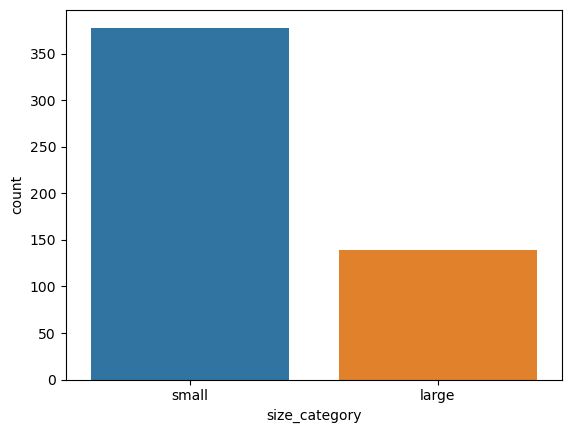

In [9]:
# Visualize the distribution of the target variable
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='size_category', data=df)
plt.show()

NameError: name 'fire_data' is not defined

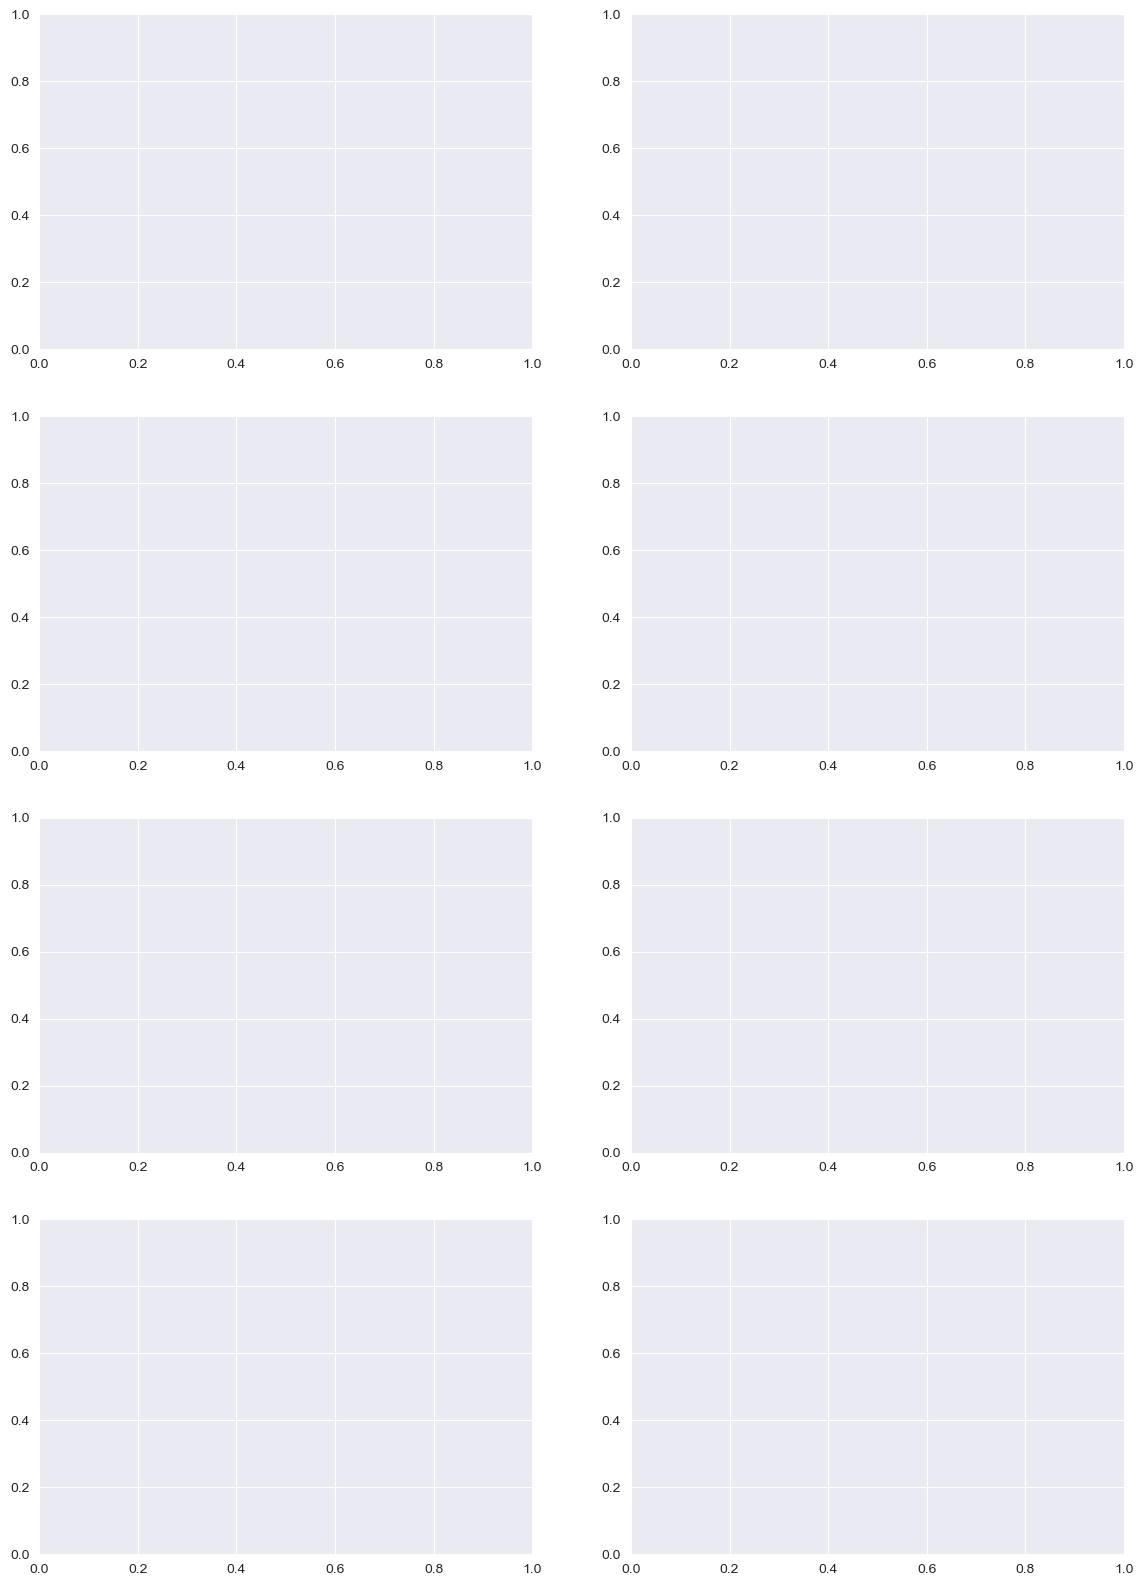

In [16]:
fig, ax = plt.subplots(4,2, figsize = (14,20))

sns.distplot(fire_data.FFMC, ax = ax[0,0])
sns.distplot(fire_data.DMC, ax = ax[0,1])
sns.distplot(fire_data.DC, ax = ax[1,0])
sns.distplot(fire_data.ISI, ax = ax[1,1])
sns.distplot(fire_data.temp, ax = ax[2,0])
sns.distplot(fire_data.RH, ax = ax[2,1])
sns.distplot(fire_data.wind, ax = ax[3,0])
sns.distplot(fire_data.rain, ax = ax[3,1])

plt.show()

In [11]:
# Encode the categorical features (month and day)
encoder = LabelEncoder()
df['month'] = encoder.fit_transform(df['month'])
df['day'] = encoder.fit_transform(df['day'])

In [12]:
# Split the data into train and test sets
X = df.drop('size_category', axis=1)
y = df['size_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Scale the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Define the neural network model
mlp = MLPClassifier(hidden_layer_sizes=(50,50),activation='relu',alpha=0.0001,max_iter=1000, random_state=42)

In [15]:
# Define the hyperparameters to search
params = {'hidden_layer_sizes': [(100,), (50, 50), (20, 20, 20)],
          'activation': ['relu', 'tanh', 'logistic'],
          'alpha': [0.0001, 0.001, 0.01]}

In [16]:
# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(mlp, params, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000,
                                     random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh', 'logistic'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(100,), (50, 50),
                                                (20, 20, 20)]},
             scoring='accuracy')

In [17]:
# Print the best hyperparameters and the corresponding accuracy
print('Best hyperparameters:', grid_search.best_params_)
y_pred = grid_search.predict(X_test)

Best hyperparameters: {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50)}


In [18]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9615384615384616


The above code defines a neural network model using MLPClassifier from the sklearn library. The max_iter parameter is set to 1000, which specifies the maximum number of iterations for the solver to converge. The random_state parameter is set to 42 to ensure reproducibility.

Next, the hyperparameters to search are defined in the params dictionary. The hyperparameters being tuned are the hidden_layer_sizes, activation function, and alpha (regularization parameter).

Then, a grid search is performed using GridSearchCV from sklearn. The cross-validation parameter cv is set to 5, which performs 5-fold cross-validation. The n_jobs parameter is set to -1 to use all available processors for parallel processing. The scoring parameter is set to 'accuracy' to evaluate the performance of the model based on the accuracy metric.

After performing the grid search, the best hyperparameters are printed. Finally, the accuracy of the model is evaluated using the test data and printed out.

The grid search helps to find the best combination of hyperparameters that maximizes the accuracy of the model. This ensures that the model is well-optimized and can generalize well on new data.

An accuracy of 0.9615384615384616 means that the model predicted the correct output for 96.15% of the samples in the test set. This is a good accuracy score, indicating that the neural network model was able to effectively learn and generalize from the training data to make accurate predictions on new, unseen data.